# Prévision des ventes en magasin WALMART 

Dans cette étude, nous allons réaliser une analyse prédictive à l'aide de deux modèles d'apprentissage automatique pour la prévision des données de ventes de la série  chronologique de Walmart




# Importer les bibliothèques nécessaires


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

import pickle 
from os import path

from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


# Exploration du  dataset 

In [2]:
df=pd.read_csv("walmart.csv")

In [3]:
df.tail()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [4]:
df.shape

(6435, 8)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


## Colonne de date convertie en type de données datetime


In [6]:

df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


## Fractionnement de la colonne de date

In [8]:
df['Annee'] = df['Date'].dt.year
df['Mois'] = df['Date'].dt.month
df['semaine'] = df['Date'].dt.isocalendar().week

In [9]:
df.sort_values(by=['Date'],inplace=True)

df.reset_index()

,index,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Annee,Mois,semaine
0,0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1287,10,2010-02-05,2193048.75,0,54.34,2.962,126.442065,9.765,2010,2,5
2,5148,37,2010-02-05,536006.73,0,45.97,2.572,209.852966,8.554,2010,2,5
3,2288,17,2010-02-05,789036.02,0,23.11,2.666,126.442065,6.548,2010,2,5
4,4147,30,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324,2010,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,3574,25,2012-10-26,688940.94,0,56.69,3.882,216.151590,7.293,2012,10,43
6431,714,5,2012-10-26,319550.77,0,71.70,3.506,224.037814,5.422,2012,10,43
6432,5719,40,2012-10-26,921264.52,0,49.65,3.917,138.728161,4.145,2012,10,43
6433,2573,18,2012-10-26,1127516.25,0,56.09,3.917,138.728161,8.243,2012,10,43


# Analyse Exploratoires des données - EDA

In [10]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Annee,Mois,semaine
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0
mean,23.000000,2011-06-17 00:00:00.000000256,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,6.447552,25.818182
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,1.0
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000,14.0
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000,26.0
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000,38.0
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,52.0
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,3.238308,14.129201


In [11]:
## Ventes Annuelle moyennes


# Grouper les données par année et calculer la moyenne des ventes hebdomadaires
moyennes_annuelles = df.groupby('Annee')['Weekly_Sales'].mean().reset_index()

# Afficher les valeurs moyennes des ventes pour chaque année
print(moyennes_annuelles)



   Annee  Weekly_Sales
0   2010  1.059670e+06
1   2011  1.046239e+06
2   2012  1.033660e+06


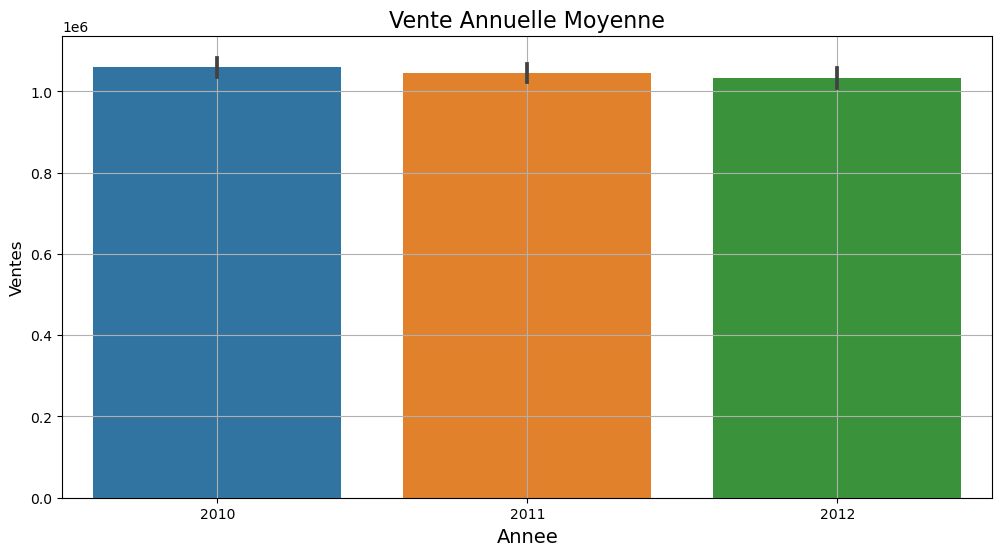

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(x='Annee',y='Weekly_Sales',data=df)
plt.ylabel('Ventes',fontsize=12)
plt.xlabel('Annee',fontsize=14)
plt.title('Vente Annuelle Moyenne',fontsize=16)
plt.savefig('Vente Annuelle Moyennes.png')
plt.grid()

## Ventes mensuelles moyennes

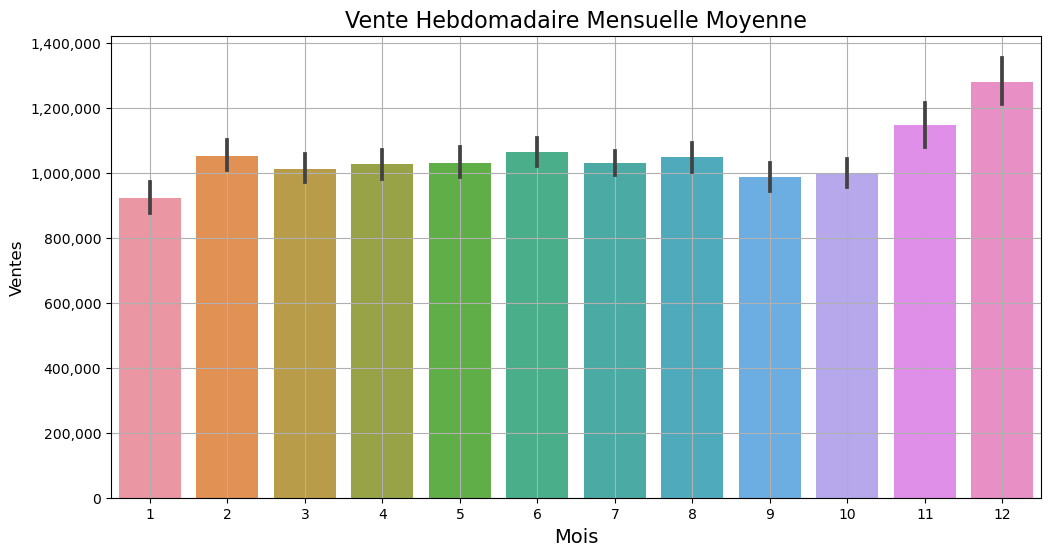

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(x='Mois',y='Weekly_Sales',data=df)
plt.ylabel('Ventes',fontsize=12)
plt.xlabel('Mois',fontsize=14)
plt.title('Vente Hebdomadaire Mensuelle Moyenne',fontsize=16)

# Format y-axis labels to avoid scientific notation
formatter = plt.FuncFormatter(lambda x, _: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.savefig('Vente_Hebdomadaire_Mensuelles_Moyennes.png')
plt.grid()

# Ventes mensuelles pour chaque année

In [14]:

data_monthly = pd.crosstab(df["Annee"], df["Mois"], values=df["Weekly_Sales"],aggfunc='sum')
data_monthly

Mois,1,2,3,4,5,6,7,8,9,10,11,12
Annee,,,,,,,,,,,,
2010,NaN,1.903330e+08,1.819198e+08,2.314124e+08,1.867109e+08,1.922462e+08,2.325801e+08,1.876401e+08,1.772679e+08,2.171618e+08,2.028534e+08,2.887605e+08
2011,1.637040e+08,1.863313e+08,1.793564e+08,2.265265e+08,1.816482e+08,1.897734e+08,2.299114e+08,1.885993e+08,2.208477e+08,1.832613e+08,2.101624e+08,2.880781e+08
2012,1.688945e+08,1.920636e+08,2.315097e+08,1.889209e+08,1.887665e+08,2.406103e+08,1.875095e+08,2.368508e+08,1.806455e+08,1.843617e+08,NaN,NaN


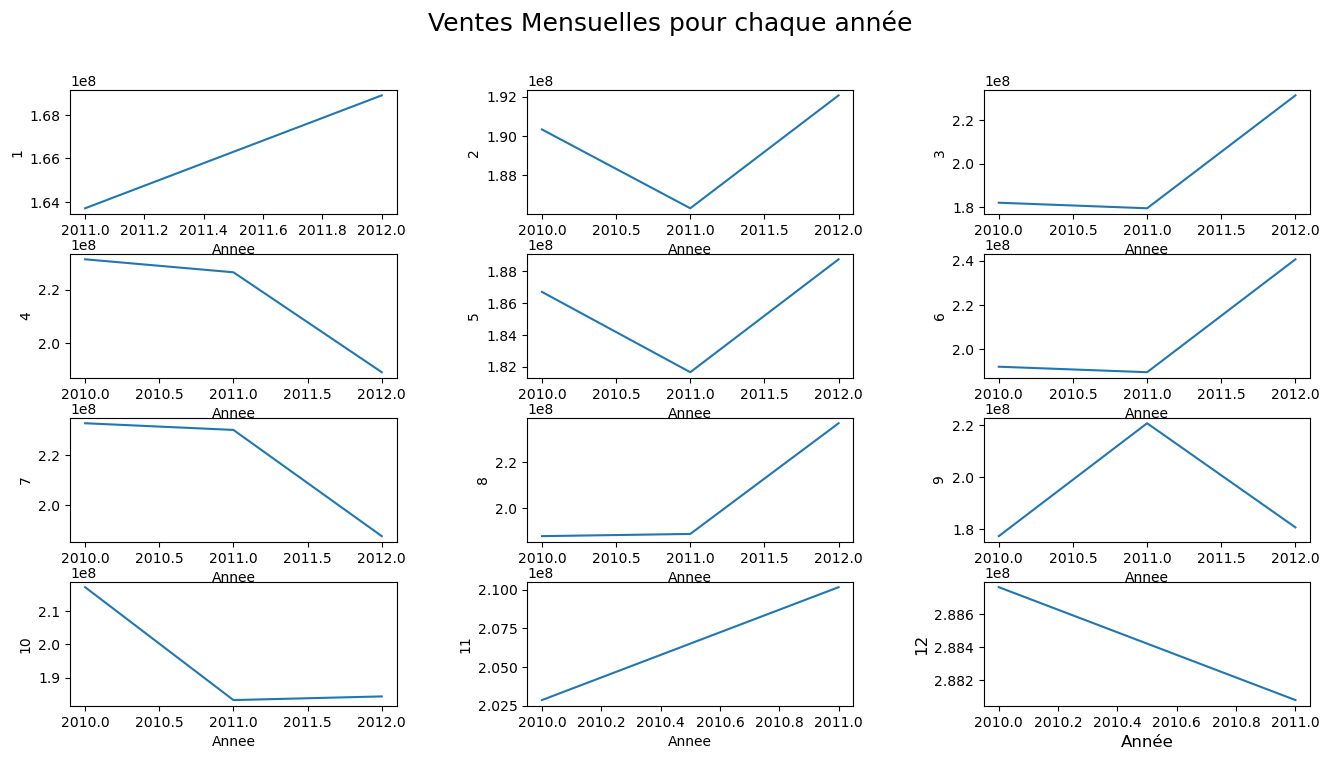

In [15]:
fig, axes = plt.subplots(4,3,figsize=(16,8))
plt.suptitle('Ventes Mensuelles pour chaque année', fontsize=18)
k=1
for i in range(4):
    for j in range(3):
      sns.lineplot(ax=axes[i,j],data=data_monthly[k])
      plt.subplots_adjust(wspace=0.4,hspace=0.32)
      plt.ylabel(k,fontsize=12)
      plt.xlabel('Année',fontsize=12)
      k+=1
    

plt.savefig('Ventes Mensuelles pour chaque Année.png')
plt.show()

# Ventes Hebdomadaires Moyennes par Magasin


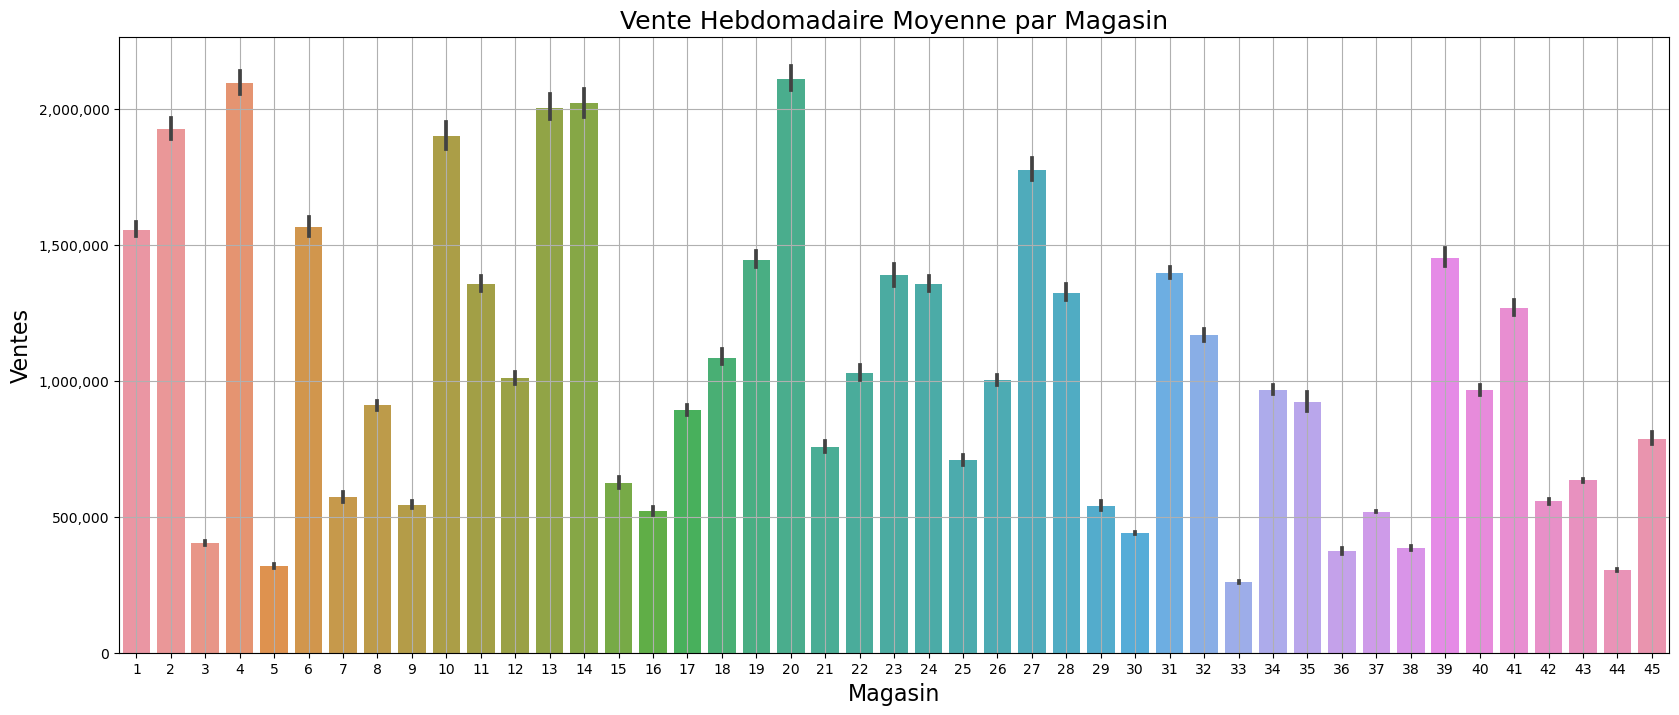

In [16]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store', y='Weekly_Sales', data=df)
plt.grid()
plt.title('Vente Hebdomadaire Moyenne par Magasin', fontsize=18)
plt.ylabel('Ventes', fontsize=16)
plt.xlabel('Magasin', fontsize=16)

# Format y-axis labels to avoid scientific notation
formatter = plt.FuncFormatter(lambda x, _: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.savefig('Vente Hebdomadaire Moyenne par Magasin.png')
plt.show()

## Ventes Vs Temperature


/var/folders/bt/y26w65957jz66zvh4cgjgfpm0000gn/T/ipykernel_70700/913708164.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temperature'])


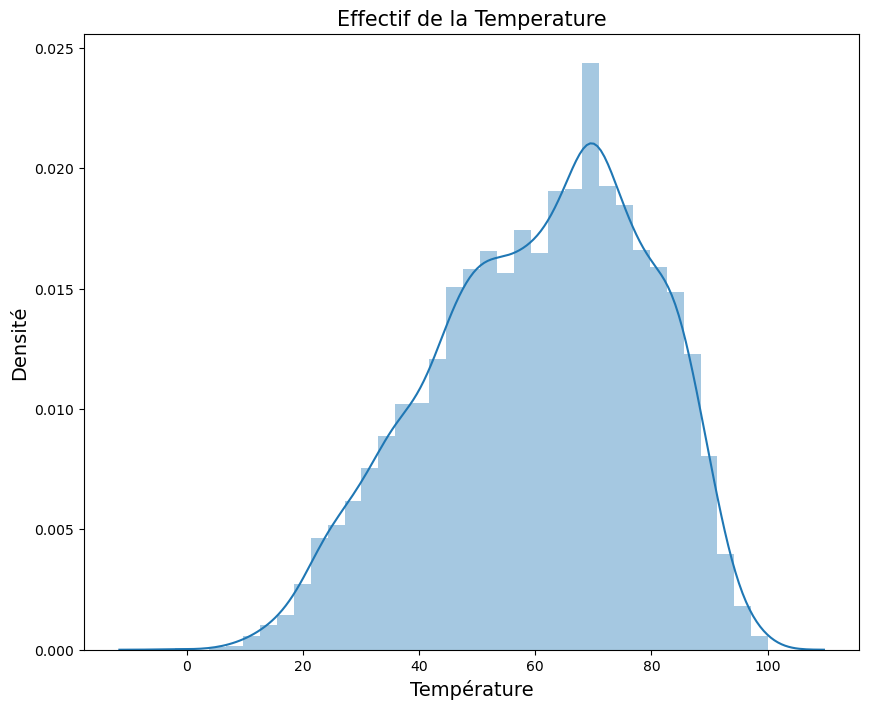

In [17]:
plt.figure(figsize=(10,8))
sns.distplot(df['Temperature'])
plt.title('Effectif de la Temperature',fontsize=15)
plt.xlabel('Température',fontsize=14)
plt.ylabel('Densité',fontsize=14)
plt.savefig('Effectif de la Temperature.png')
plt.show()

## Distribution des Vacances




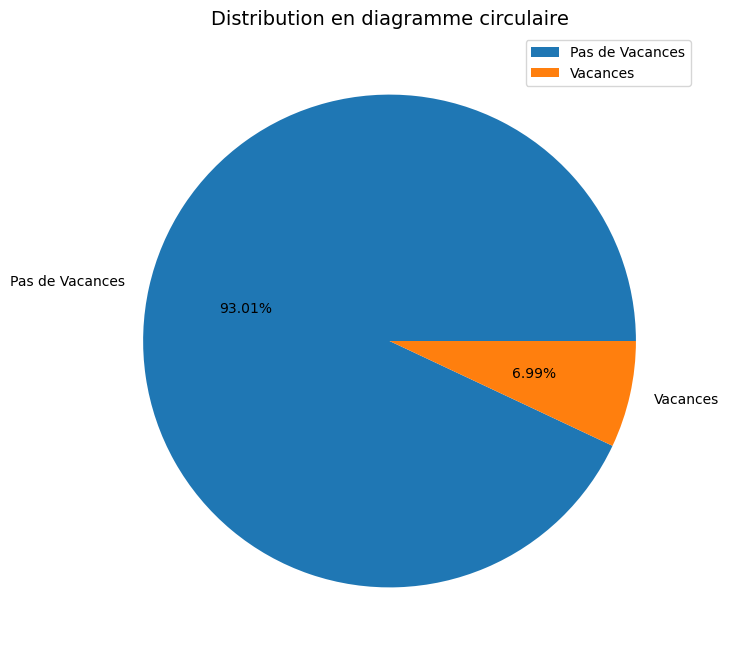

In [18]:
plt.figure(figsize=(8,8))
plt.pie(df['Holiday_Flag'].value_counts(),labels=['Pas de Vacances','Vacances'],autopct='%0.2f%%')
plt.title("Distribution en diagramme circulaire",fontsize=14)
plt.legend()
plt.savefig('Vacances_distribution.png')
plt.show()

# PREPARATION DES DONNEES


In [19]:
#Verification s'il existe des valeurs manquante
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Annee           0
Mois            0
semaine         0
dtype: int64

## Convertir les variables catégorielle en Numérique

In [20]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

Holiday_Flag       2
Annee              3
Mois              12
Store             45
semaine           52
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [21]:
#Checking number of unique rows in each feature

# Definir la variable cible et etiquette
target = 'Weekly_Sales'
features = [col for col in df.columns if col != target]


nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=45:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mRésultat:\033[0m Notre Dataset a {} variables numériques & {} variables catégorielles .'.format(len(nf),len(cf)))


Résultat: Notre Dataset a 6 variables numériques & 4 variables catégorielles .


In [22]:

cat_col = ['Store','Annee','Mois']
data_cat = df[cat_col].copy()
data_cat.tail()


,Store,Annee,Mois
3574,25,2012,10
714,5,2012,10
5719,40,2012,10
2573,18,2012,10
6434,45,2012,10


In [23]:

data_cat = pd.get_dummies(df,columns=cat_col)

In [24]:
data_cat.replace({True: 1, False: 0}, inplace=True)


In [25]:
data_cat.shape

(6435, 68)

In [26]:
df=data_cat.copy()
df.head()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,semaine,Store_1,Store_2,...,Mois_3,Mois_4,Mois_5,Mois_6,Mois_7,Mois_8,Mois_9,Mois_10,Mois_11,Mois_12
0,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,1,0,...,0,0,0,0,0,0,0,0,0,0
1287,2010-02-05,2193048.75,0,54.34,2.962,126.442065,9.765,5,0,0,...,0,0,0,0,0,0,0,0,0,0
5148,2010-02-05,536006.73,0,45.97,2.572,209.852966,8.554,5,0,0,...,0,0,0,0,0,0,0,0,0,0
2288,2010-02-05,789036.02,0,23.11,2.666,126.442065,6.548,5,0,0,...,0,0,0,0,0,0,0,0,0,0
4147,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324,5,0,0,...,0,0,0,0,0,0,0,0,0,0


## Détection des valeurs aberrantes et des anomalies




In [27]:
numeric_col = ['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
data = df[numeric_col].copy()

# Détection des valeurs aberrantes avec le score z
z_scores = np.abs(stats.zscore(data))

# Définir un seuil pour les valeurs aberrantes
threshold = 3.5
outliers = np.where(z_scores > threshold)

# Afficher les indices des valeurs aberrantes
print("Nombre de valeurs aberrantes:", len(outliers[0]))




Nombre de valeurs aberrantes: 463


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


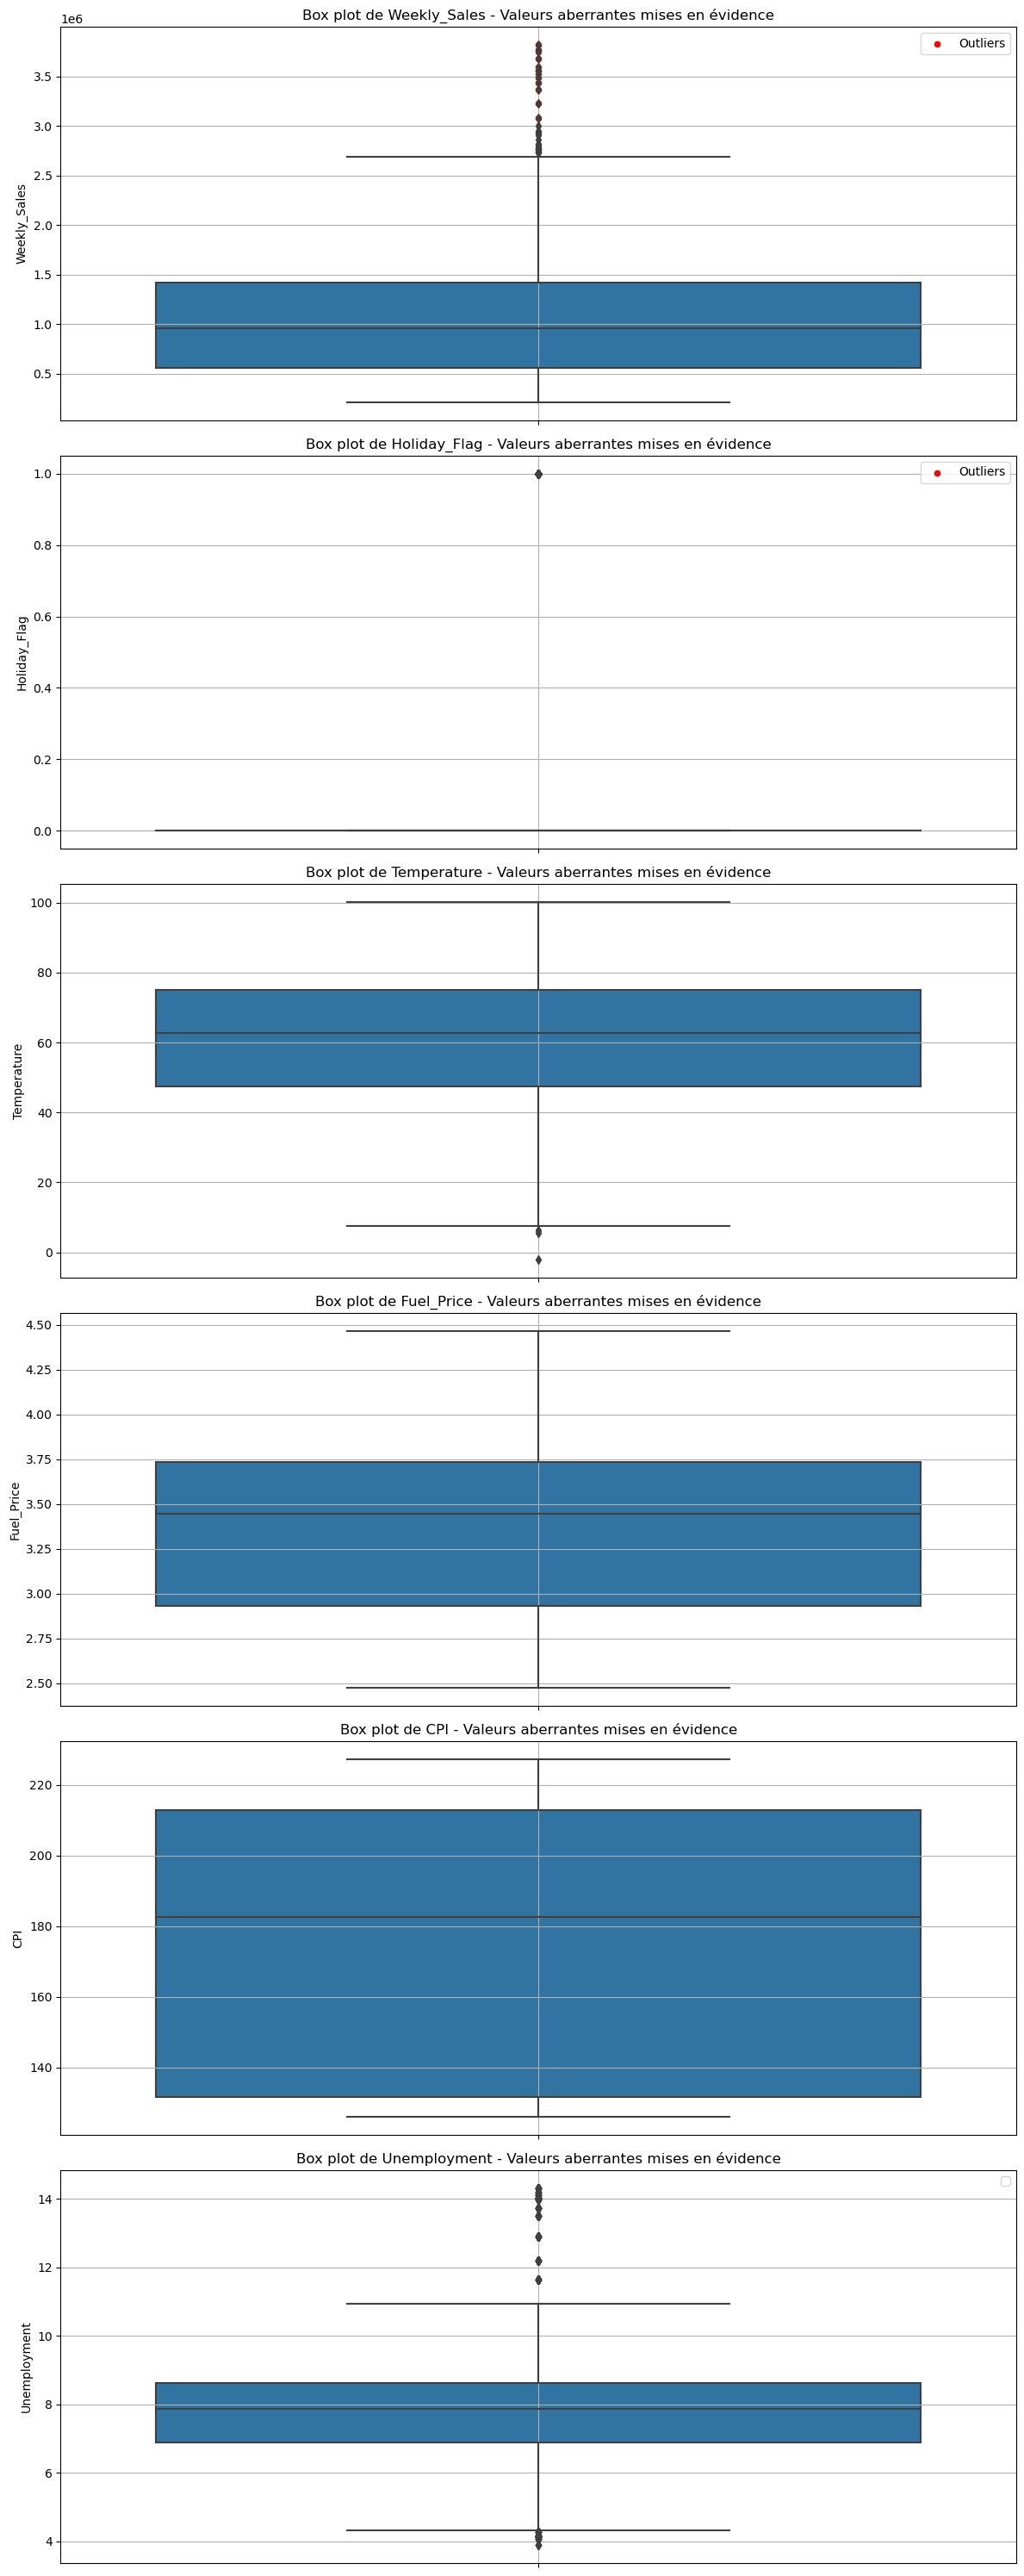

In [28]:
# Création des box plots avec des points rouges pour les valeurs aberrantes
fig, axes = plt.subplots(nrows=len(numeric_col), ncols=1, figsize=(12, 30))

for i, col in enumerate(numeric_col):
    sns.boxplot(data=data, y=col, ax=axes[i])
    # Ajouter les points pour les valeurs aberrantes
    outlier_indices = np.where(z_scores[col] > threshold)
    sns.scatterplot(y=data.iloc[outlier_indices][col], x=[0]*len(outlier_indices[0]), color='red', ax=axes[i], label='Outliers')
    axes[i].set_title(f'Box plot de {col} - Valeurs aberrantes mises en évidence')
    axes[i].grid(True)

plt.tight_layout()
plt.legend()
plt.show()


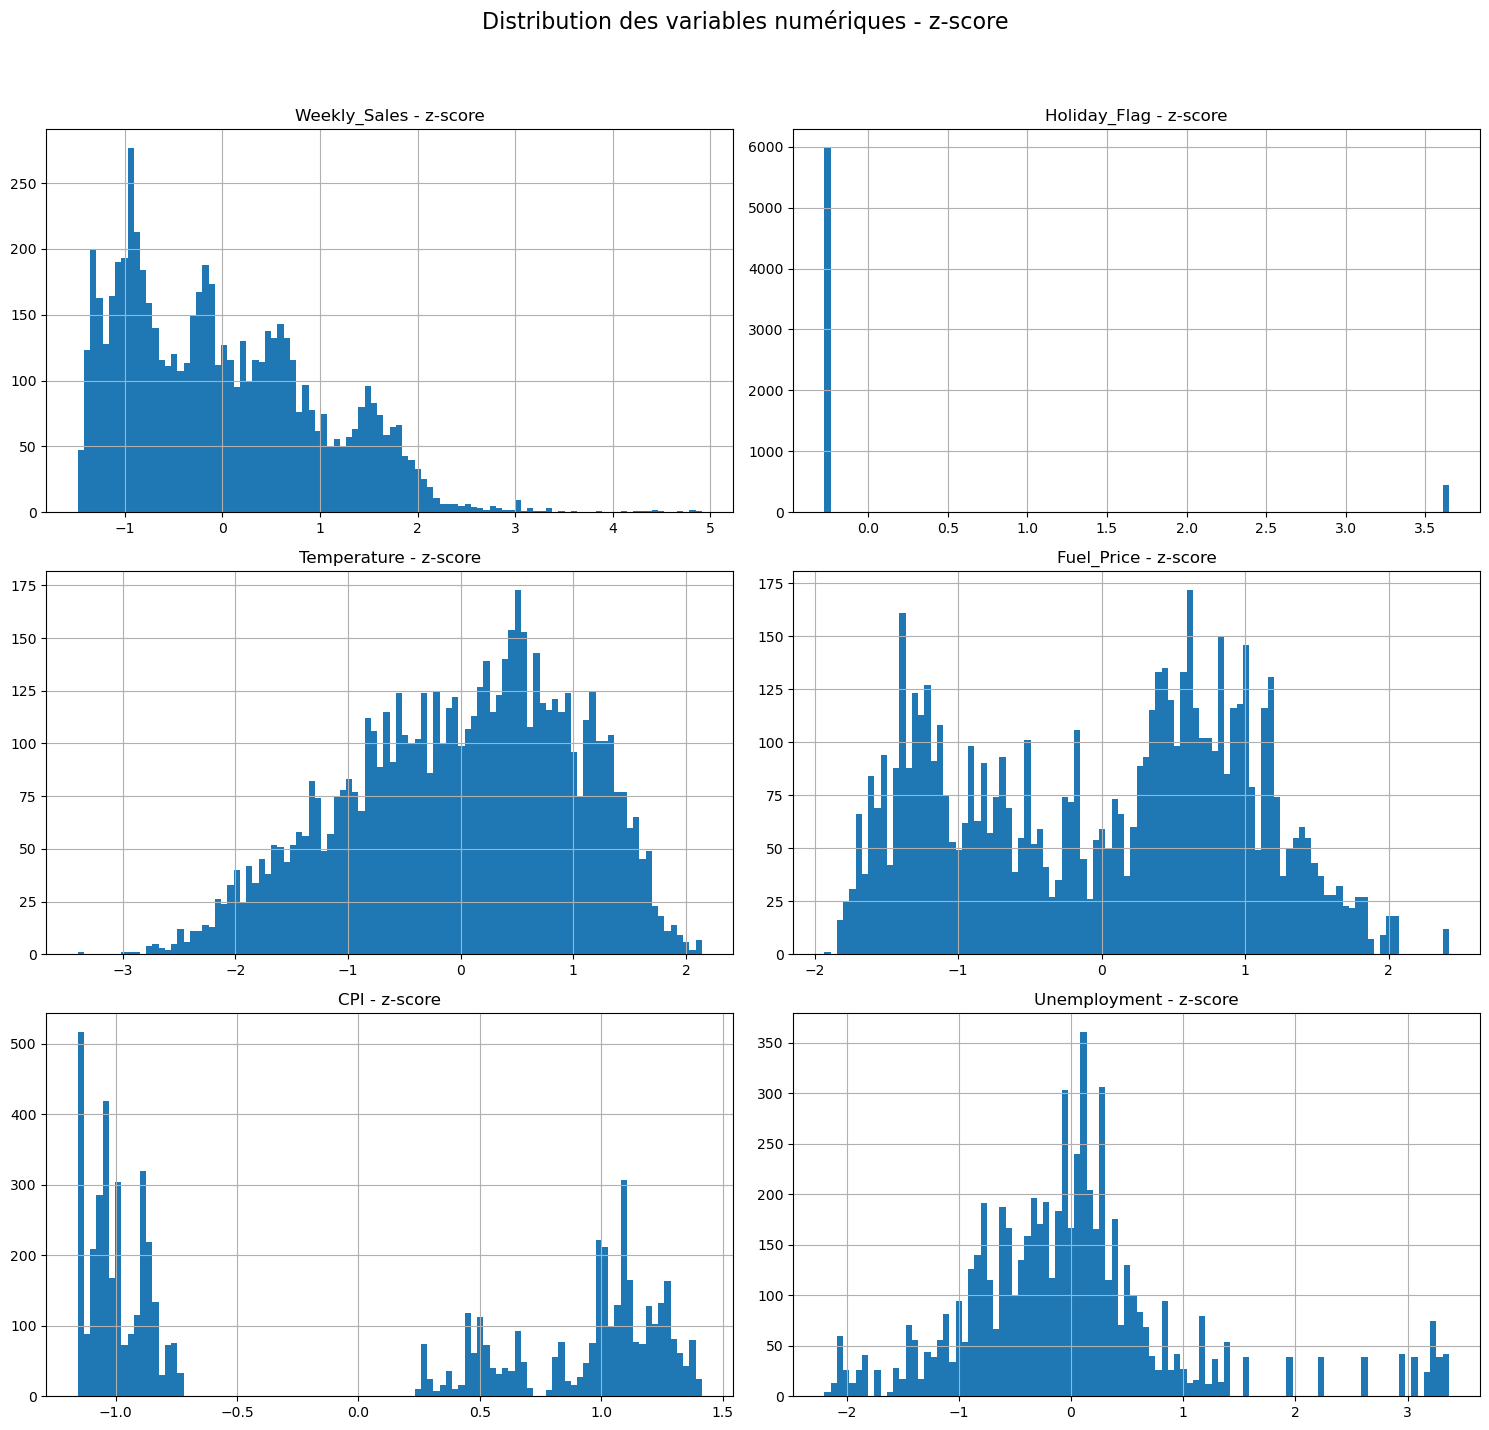

In [29]:

# Normaliser les données en utilisant le z-score
data_numeric_z = data.apply(stats.zscore)

# Visualisation des distributions des variables après normalisation
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Définir un titre pour l'ensemble de la figure
fig.suptitle('Distribution des variables numériques - z-score', fontsize=16)

# Liste des noms des variables pour les titres des sous-graphiques
titles = ['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Boucle pour créer chaque histogramme
for i, title in enumerate(titles):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    data_numeric_z[title].hist(bins=100, ax=ax)
    ax.grid(True, which='both')
    ax.set_title(f'{title} - z-score')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajuster la mise en page pour éviter la superposition des titres
plt.show()


In [30]:


# Détection des valeurs aberrantes à 2 et 3 écarts types pour chaque variable
variables = ['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

for var in variables:
    # 3 écarts types
    print(f"3.5 écarts types - {var}: {df[data_numeric_z[var] > 3.5].shape[0]} observations \t{var} max (2σ):", 
          np.max(df[data_numeric_z[var] < 3][var]) )
 
    print()


3.5 écarts types - Weekly_Sales: 13 observations 	Weekly_Sales max (2σ): 2739019.75

3.5 écarts types - Holiday_Flag: 450 observations 	Holiday_Flag max (2σ): 0

3.5 écarts types - Temperature: 0 observations 	Temperature max (2σ): 100.14

3.5 écarts types - Fuel_Price: 0 observations 	Fuel_Price max (2σ): 4.468

3.5 écarts types - CPI: 0 observations 	CPI max (2σ): 227.2328068

3.5 écarts types - Unemployment: 0 observations 	Unemployment max (2σ): 13.503



In [31]:
df = df[(np.abs(stats.zscore(data)) < 3).all(axis = 1)]
df.shape

(5758, 68)

## Normalisation des Données

In [33]:
num_col = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [34]:
df.head()


,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,semaine,Store_1,Store_2,...,Mois_3,Mois_4,Mois_5,Mois_6,Mois_7,Mois_8,Mois_9,Mois_10,Mois_11,Mois_12
0,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,1,0,...,0,0,0,0,0,0,0,0,0,0
1287,2010-02-05,2193048.75,0,54.34,2.962,126.442065,9.765,5,0,0,...,0,0,0,0,0,0,0,0,0,0
5148,2010-02-05,536006.73,0,45.97,2.572,209.852966,8.554,5,0,0,...,0,0,0,0,0,0,0,0,0,0
2288,2010-02-05,789036.02,0,23.11,2.666,126.442065,6.548,5,0,0,...,0,0,0,0,0,0,0,0,0,0
4147,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324,5,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df = normalization(df.copy(),num_col)
df.head()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,semaine,Store_1,Store_2,...,Mois_3,Mois_4,Mois_5,Mois_6,Mois_7,Mois_8,Mois_9,Mois_10,Mois_11,Mois_12
0,2010-02-05,0.566898,0,0.388689,0.050100,0.840500,0.439214,5,1,0,...,0,0,0,0,0,0,0,0,0,0
1287,2010-02-05,0.784119,0,0.515856,0.245491,0.003737,0.611596,5,0,0,...,0,0,0,0,0,0,0,0,0,0
5148,2010-02-05,0.128911,0,0.427378,0.050100,0.828209,0.485765,5,0,0,...,0,0,0,0,0,0,0,0,0,0
2288,2010-02-05,0.228961,0,0.185729,0.097194,0.003737,0.277328,5,0,0,...,0,0,0,0,0,0,0,0,0,0
4147,2010-02-05,0.100877,0,0.354228,0.050100,0.837102,0.461866,5,0,0,...,0,0,0,0,0,0,0,0,0,0


## Corrélation entre les variables numériques

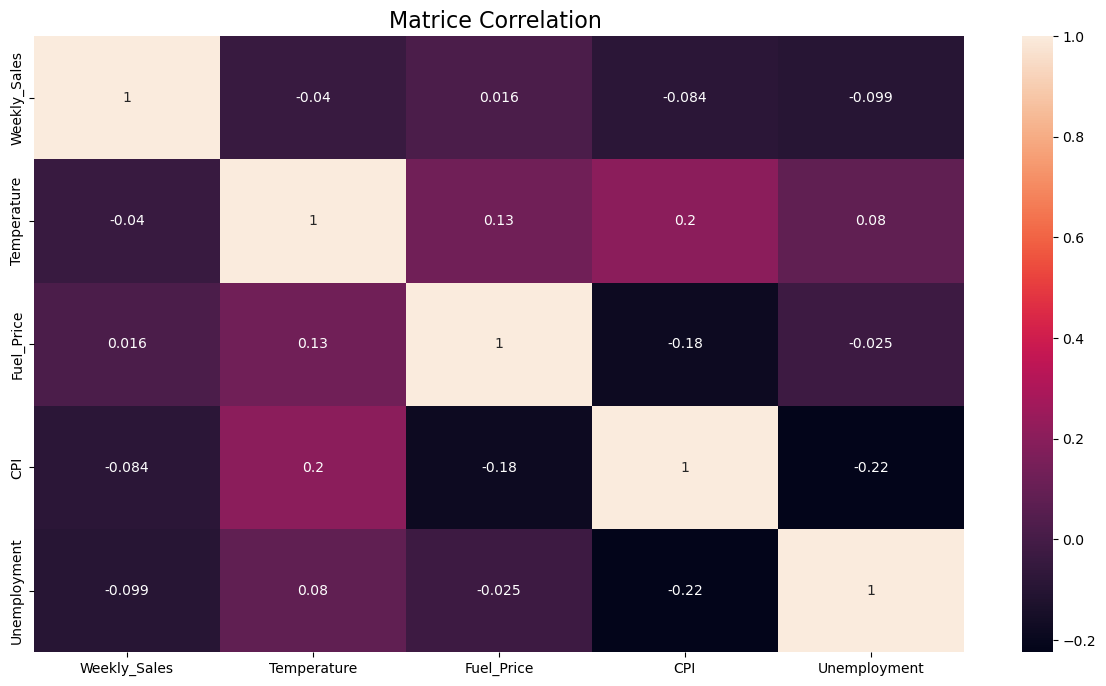

In [36]:
plt.figure(figsize=(15,8))
corr = df[num_col].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Matrice Correlation ',fontsize=16)
plt.savefig('correlation_matrix.png')
plt.show()

# Sélection des Données D'Entrainement et de Test 

In [37]:
X = df.drop(['Weekly_Sales','Date'],axis=1)
Y = df.Weekly_Sales

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)


# Modèles de Prédiction
##  Modèle de Regression Linéaire


In [46]:

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [47]:
lr_acc_Train = lr.score(X_train,y_train)*100
print("Train: Linear Regressor Accuracy - ",lr_acc_Train)

lr_acc = lr.score(X_test,y_test)*100
print("Test: Linear Regressor Accuracy - ",lr_acc)

Train: Linear Regressor Accuracy -  96.05958996471105
Test: Linear Regressor Accuracy -  96.39025085920923


In [48]:
y_pred = lr.predict(X_test)


In [49]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.026692895496337642
MSE 0.0016187410833342476
RMSE 0.040233581537494865
R2 0.9639036969856363


In [50]:

lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_df
     

,Actual,Predicted
6246,0.039999,0.147504
3846,0.601387,0.603089
3093,0.351662,0.298379
3631,0.290885,0.298805
5951,0.159565,0.122015
...,...,...
1020,0.260944,0.285219
3679,0.288320,0.325671
2164,0.130549,0.127148
5899,0.138116,0.116399


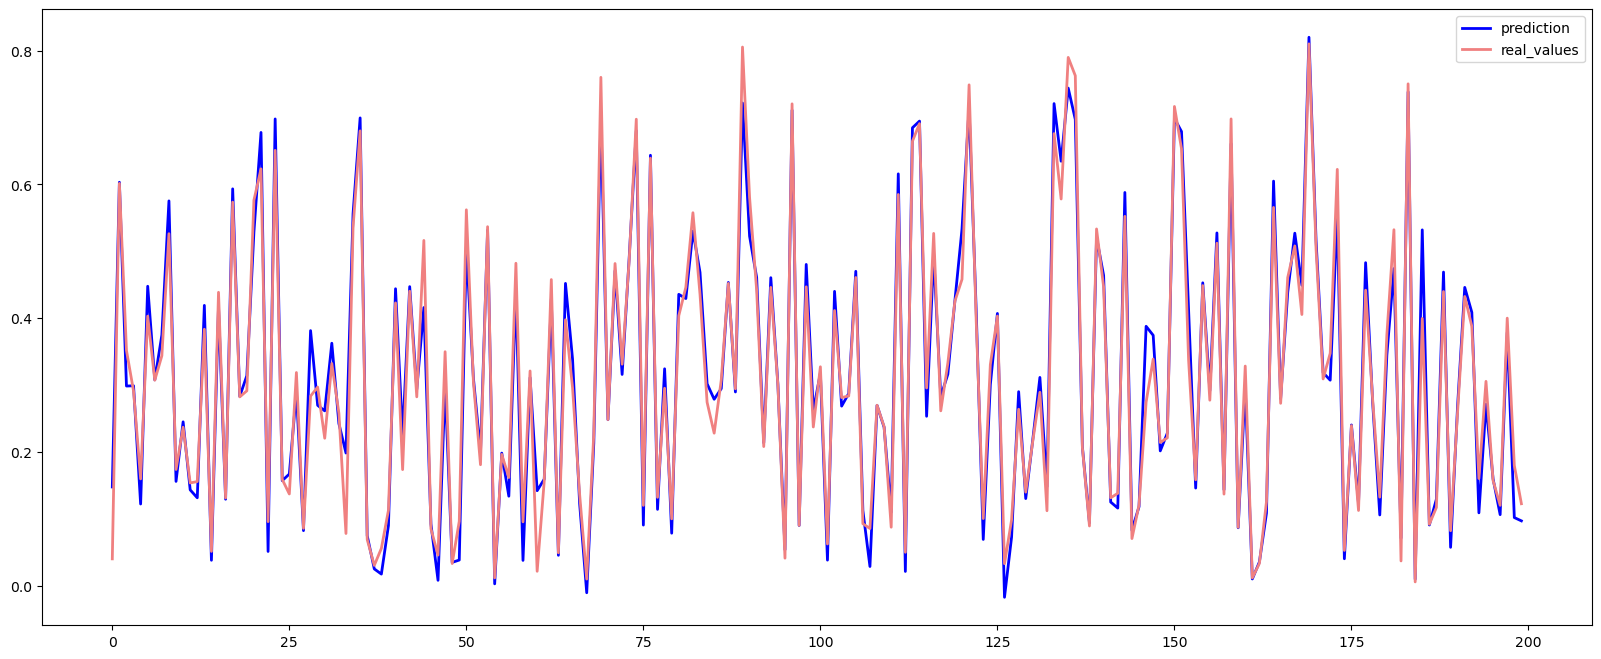

In [51]:
plt.figure(figsize=(20,8))
plt.plot(lr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.savefig('lr_real_pred.png')
plt.show()

## Enregistrement du modèle d'entrainement


In [52]:
pkl_filename = "./models/Regression_Lineaire.pkl"
if (not path.isfile(pkl_filename)):
  # Enregistrement de notre modele d'entrainement
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lr, file)
  print("Model enregistré dans le disque")
else:
  print("Model déjà existant")

Model déjà existant


## Modèle Random Forest Regressor 



In [80]:
rf = RandomForestRegressor( max_depth = 50,
    random_state = 808)
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=50, random_state=808)

In [81]:
params = rf.get_params()
print(params)


{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 50, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 808, 'verbose': 0, 'warm_start': False}


In [84]:
rf_acc = rf.score(X_test,y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)
        

Random Forest Regressor Accuracy -  98.14140328744793


In [85]:
# Calculer le coefficient de détermination (R^2) pour l'ensemble d'entraînement et de test
train_r2 = rf.score(X_train, y_train)*100
test_r2 = rf.score(X_test, y_test)*100

print("Score Train R^2:", train_r2)
print("Score Test R^2:", test_r2)

Score Train R^2: 99.72887888847703
Score Test R^2: 98.14140328744793


In [86]:
y_pred = rf.predict(X_test)




In [87]:

print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))
     

MAE 0.018386955728162062
MSE 0.0008334614785167386
RMSE 0.028869732913844884
R2 0.9814269011000829


In [88]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_df

,Actual,Predicted
6246,0.039999,0.037902
3846,0.601387,0.601611
3093,0.351662,0.310663
3631,0.290885,0.281152
5951,0.159565,0.142577
...,...,...
1020,0.260944,0.265273
3679,0.288320,0.297866
2164,0.130549,0.117983
5899,0.138116,0.127611


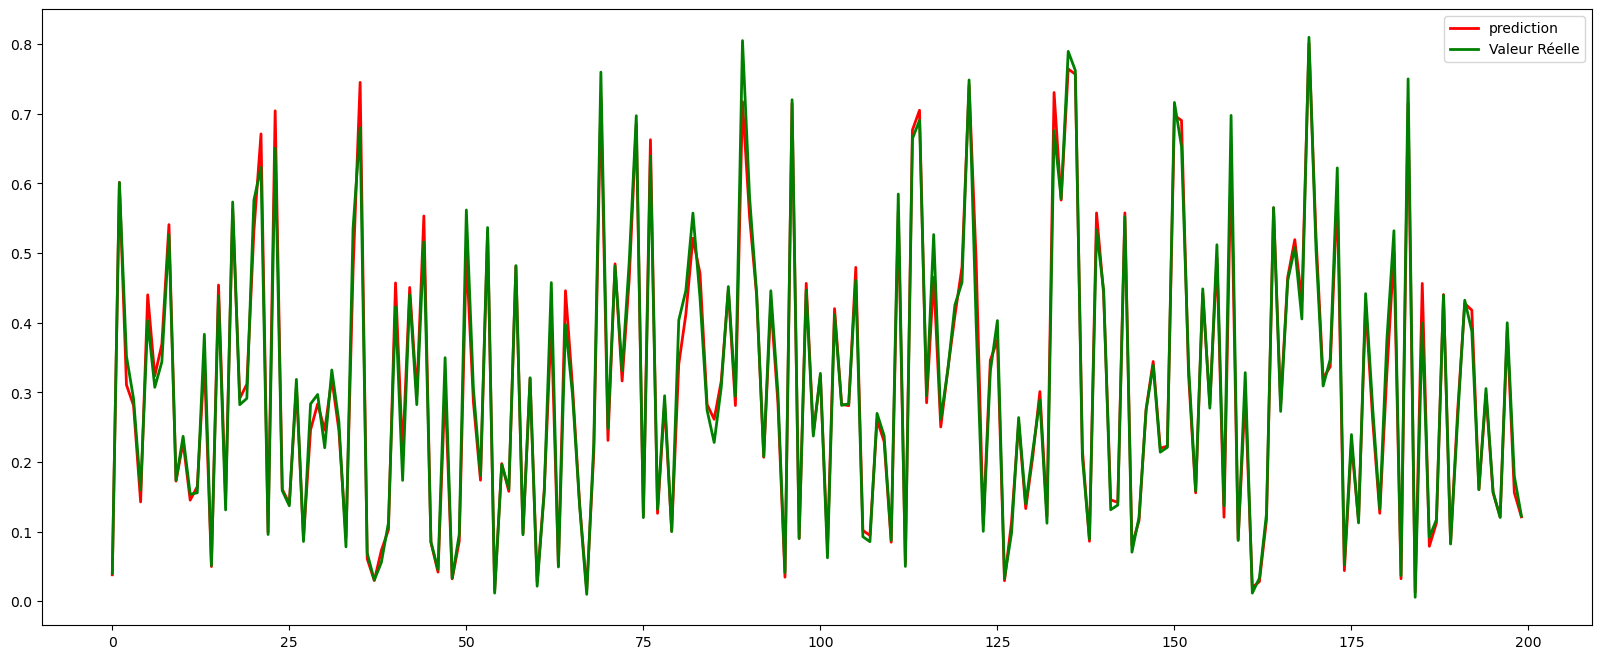

In [92]:
plt.figure(figsize=(20,8))
plt.plot(rf.predict(X_test[:200]), label="prediction", linewidth=2.0,color='red')
plt.plot(y_test[:200].values, label="Valeur Réelle", linewidth=2.0,color='green')
plt.legend(loc="best")
plt.savefig('rf_real_pred.png')
plt.show()

In [95]:
scores = []
for depth in np.arange(2, 52, 1):
    
    rf = RandomForestRegressor( max_depth = depth,
    random_state = 808)
    rf.fit(X_train, y_train)


    train_r2 = rf.score(X_train, y_train)*100
    test_r2 = rf.score(X_test, y_test)*100

    scores.append({'max_depth': depth,'train': train_r2,'test': test_r2,
                  })

scores = pd.DataFrame(scores)
scores

,max_depth,train,test
0,2,19.382293,19.787432
1,3,28.408411,29.284831
2,4,36.048409,36.831145
3,5,41.641756,42.121275
4,6,47.233760,46.995267
5,7,51.970320,50.823263
6,8,57.677909,57.012900
7,9,60.306529,59.706192
8,10,64.801985,63.794072
9,11,68.686943,67.293566


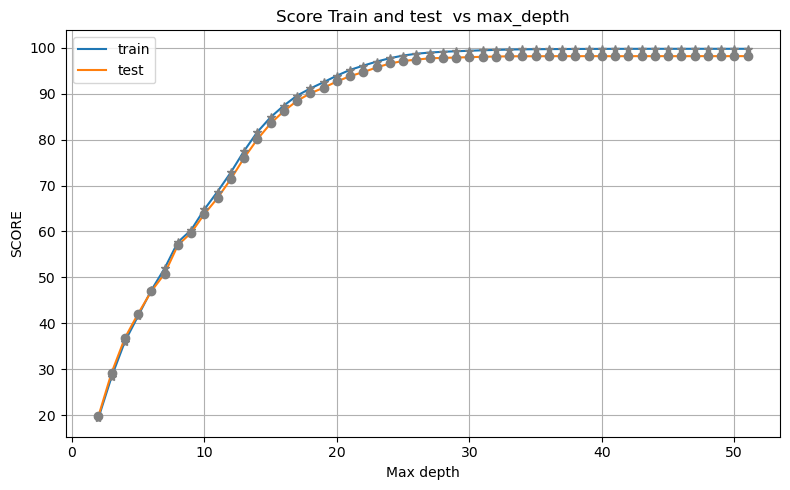

In [96]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
plt.plot(scores.max_depth, scores.train, label = 'train')
plt.plot(scores.max_depth, scores.test, label = 'test')
plt.plot(scores.max_depth, scores.train, '*', color = 'gray')
plt.plot(scores.max_depth, scores.test, 'o', color = 'gray')
ax.grid(True, which = 'both')
ax.set_title('Score Train and test  vs max_depth')
ax.set_xlabel('Max depth')
ax.set_ylabel('SCORE')
plt.legend()

plt.tight_layout()
plt.show()

## ROBUSTESSE MODEL - GridSearchCV

In [98]:

from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [808]
}

# Initialiser le modèle
rf = RandomForestRegressor()

# Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# Entraîner le modèle avec les meilleurs hyperparamètres trouvés
grid_search.fit(X_train, y_train)

# Meilleurs paramètres trouvés par GridSearchCV
best_params = grid_search.best_params_
print("Meilleurs paramètres trouvés :", best_params)

# Entraîner le modèle final avec les meilleurs paramètres
best_rf = grid_search.best_estimator_

# Calculer le coefficient de détermination (R^2) pour l'ensemble d'entraînement et de test
train_r2 = best_rf.score(X_train, y_train) * 100
test_r2 = best_rf.score(X_test, y_test) * 100

print("Score Train R^2:", train_r2)
print("Score Test R^2:", test_r2)


Fitting 3 folds for each of 135 candidates, totalling 405 fits
Meilleurs paramètres trouvés : {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 808}
Score Train R^2: 99.735216612509
Score Test R^2: 98.14733365957305


In [100]:
y_pred = best_rf.predict(X_test)

print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))
     

MAE 0.01832610025081189
MSE 0.0008308020867906192
RMSE 0.02882363763980215
R2 0.9814857297662836


# Comparaison des Modèles 

In [105]:
acc = {'model':['Regression_Linéaire_acc','RandomForest_acc','rf_acc_GridSearchCV'],'accuracy':[lr_acc,rf_acc,test_r2]}

acc_df = pd.DataFrame(acc)
acc_df

,model,accuracy
0,Regression_Linéaire_acc,96.390251
1,RandomForest_acc,98.141403
2,rf_acc_GridSearchCV,98.147334


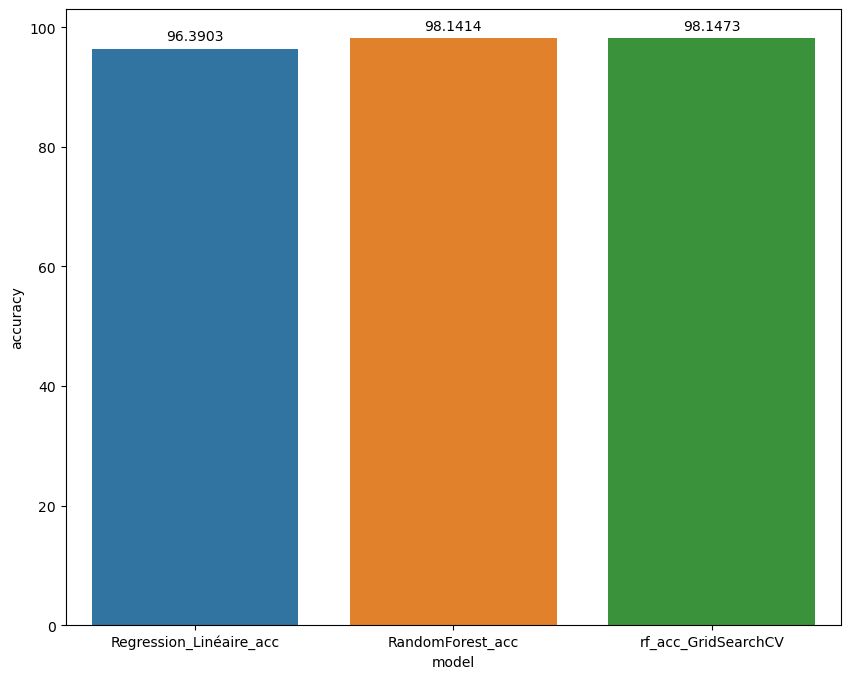

In [107]:
# Créer la figure et le barplot
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x='model', y='accuracy', data=acc_df)

# Ajouter les annotations pour chaque barre
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.4f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 9),
                     textcoords='offset points')

# Sauvegarder et afficher la figure
plt.savefig('models_comparaison.png')
plt.show()

# Résultats & Conclusion

Voici quelques résultats clés du projet :

<li>Le jeu de données était assez petit avec seulement 6435 échantillons et après le prétraitement, 7,5 % des échantillons de données ont été supprimés.
<li>
La visualisation de la distribution des données et de leurs relations nous a aidés à obtenir des informations sur l'ensemble des caractéristiques de notre dataset.

<li>L'application d'algorithmes tels que la régression linéaire, la forêt aléatoire et la recherche sur grille (GridSearchCV) nous a permis de comparer leurs performances sur ce jeu de données spécifique.
</li>
Il est clair que l'utilisation de l'algorithme de régression d'ensemble, en l'occurrence la forêt aléatoire, est préférable, car il a surpassé l'algorithme de regression linéaire en termes de performance, avec des scores de précision assez comparables mais également plus généralisables.

<li>Comparaison des modèles

<ol><li>Précision de la régression linéaire : 96,39%
<li>Précision de la régression de la forêt aléatoire : 98,14%
<li>Précision de la régression de la forêt aléatoire avec GridSearchCV : 98,15%

Nikiema Boubacar 
Email: nikiemaboubacar@gmail.Com